# WS09: Robust nonlinear solvers

These exercises are indented to give you practice at using the material on numerical approximation and are intended to reinforce the material that was covered in lectures.

Please attempt the worksheet before your tutorial. Support is available in your tutorial or in the Class Team.

*These are partial solutions. Please create [Issues](https://gitlab.com/comp2421-numerical-computation/book/-/issues) and [Merge requests](https://gitlab.com/comp2421-numerical-computation/book/-/merge_requests) with your solutions.*

## Part a (pen and paper warm up)

### 1. Convergence of Newton’s method

For
$$
f(x) =  x(x-3)^2
$$
with
$$
f^\prime(x) = 3(x-1)(x-3),
$$
we know $f(x) = 0$ has two solution $x=0$ and $x=3$. You might plot this function in the following Q4 to help you visualise it.

Starting form initial guesses $x_0 = 0.5$ and $x_0=1.5$ respectively, and apply two Newton's iterations to see which solution you will get.

### 2. Problems of  Newton’s method

Create an equation so that Newton's method does not work, and prove it using your implementation in WS08.

### 3.  The secant method

Use the secant method to solve the above equation $f(x)=0$, and iterate three times from two initial guesses $x_0=4$, $x_1=5$.

## Part b (code implementations and testing)

### 4. Plot the curve in Q1

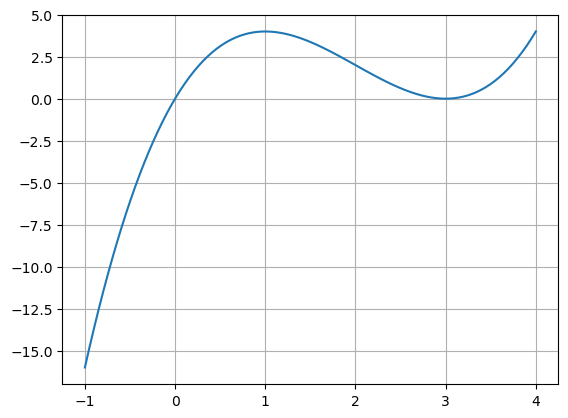

In [1]:
import numpy as np
def f(x):
    return x*x*x - 6.0*x*x +9.0*x
    
    
X = np.linspace(-1.0, 4.0, num=100, endpoint=True)
Y = np.zeros(100)
for i in range(len(Y)):
    Y[i] = f(X[i])
    
import matplotlib.pyplot as plt
fig = plt.figure()
plt.plot(X, Y)
plt.grid()
plt.show()

### 5. Implement the secant method

In [2]:
import numpy as np

In [3]:
def secant(f, x0, x1, tol):
    x = x1
    it = 0
    while abs(f(x)) > tol:   # iterate until less than or eq tol
        x = x - f(x1) *(x1-x0) / (f(x1) - f(x0))  # apply one Newton iteration
        x0 = x1
        x1 = x
        it = it + 1

    return x, it


### 6. Test your implementation

In [4]:
x, it = secant(f, 4.0, 5.0, 1.e-6)
print(f"The secant method: {x} after {it} iterations")
np.testing.assert_allclose(abs(f(x)), 0.0, atol=1.0e-6)

The secant method: 3.0004913634209194 after 17 iterations


## Part c: Extension

Run the following SciPy solver, which struggles to find the solution $x=3$ for equation $f(x) = x(x-3)^2 =0$.

- Read the instruction of this solver at 
<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq">https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq</a>,
and try to understand why?

- Please try other solvers such as: optimize.newton( ) to see whether it can find the solution $x=3$

In [5]:
from scipy import optimize

In [6]:
root = optimize.brentq(f, -1, 10, full_output=True)
print(root)

(-3.8743560727680246e-15,       converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: -3.8743560727680246e-15)


In [7]:
root = optimize.newton(f, 1.5, full_output=True)
print(root)

(2.9999999887608166,       converged: True
           flag: 'converged'
 function_calls: 22
     iterations: 21
           root: 2.9999999887608166)
